# Models Results and Analisis

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [ ]:
# Read data
df_losses = pd.read_csv('../data/models/losses.csv')

df_blue_metrics = pd.read_csv('../data/models/bleu_metrics.csv')

### Plot Results

In [28]:
# process losses data
df_losses.columns = df_losses.columns.str.replace('_train', ' train') \
                       .str.replace('_val',   ' val')

# Make 'epoch' the index
df_losses = df_losses.set_index('epoch')

# Extract two smaller DataFrames
train_losses = df_losses.filter(like='train')
val_losses   = df_losses.filter(like='val')

In [29]:
# Process blue metrics data
df_blue_metrics = df_blue_metrics.set_index('epoch')

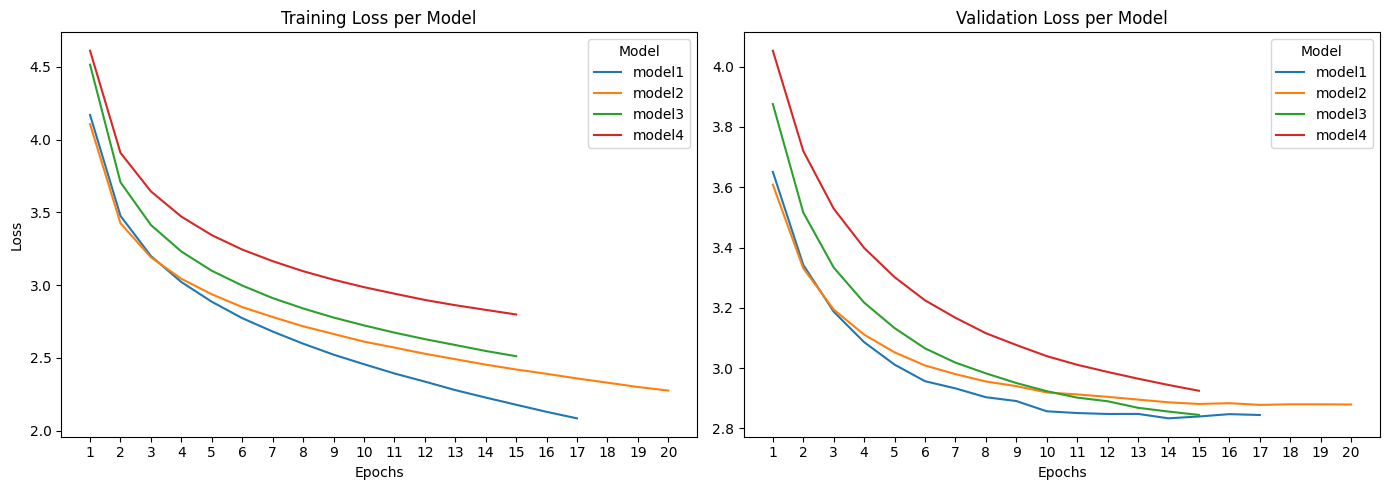

In [39]:
# Plot training and validation losses

fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Training Loss
for col in train_losses.columns:
    model = col.split()[0]
    ax_train.plot(train_losses.index, train_losses[col], label=model)
ax_train.set_title("Training Loss per Model")
ax_train.set_xlabel("Epochs")
ax_train.set_ylabel("Loss")
ax_train.set_xticks(range(1, len(df_losses.index) + 1))
ax_train.legend(title="Model")

# Validation Loss
for col in val_losses.columns:
    model = col.split()[0]
    ax_val.plot(val_losses.index, val_losses[col], label=model)
ax_val.set_title("Validation Loss per Model")
ax_val.set_xlabel("Epochs")
ax_val.set_xticks(range(1, len(df_losses.index) + 1))
ax_val.legend(title="Model")

plt.tight_layout()
plt.show()


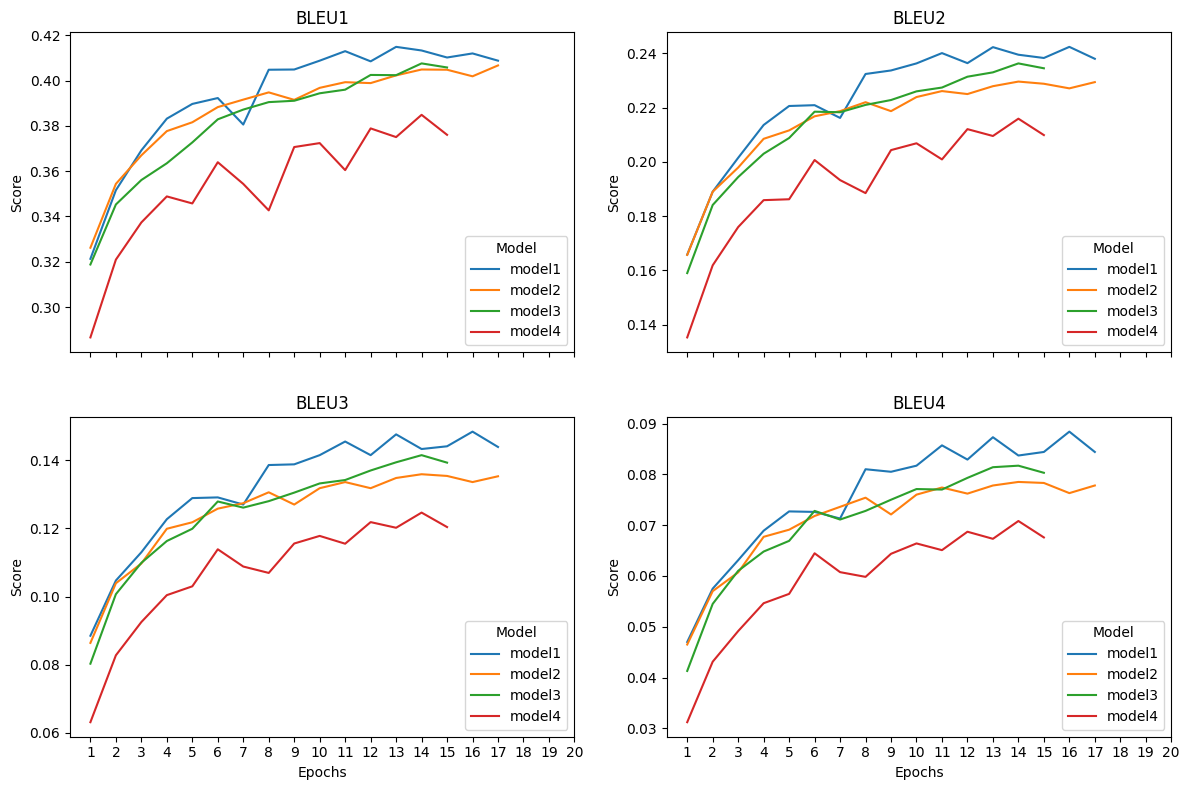

In [ ]:
# Plot Blue metrics per model (on validation data)

# Define the BLEU metrics
metrics = ['bleu1', 'bleu2', 'bleu3', 'bleu4']
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

for ax, metric in zip(axes.flatten(), metrics):
   
    cols = df_blue_metrics.filter(like=metric).columns
    for col in cols:
        model = col.split('_')[0]
        ax.plot(df_blue_metrics.index, df_blue_metrics[col], label=model)
    ax.set_title(metric.upper())
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Score")
    ax.set_xticks(df.index)
    ax.legend(title="Model")
    
# Formatting the plot
for ax in axes[0]:
    ax.set_xlabel("")

for ax in axes[1]:
    ax.set_xlabel("Epochs")
    
fig.subplots_adjust(hspace=5)

plt.tight_layout()
plt.show()
